In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [47]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3132 non-null   int64  
 1   ontology       3132 non-null   object 
 2   failed         3132 non-null   bool   
 3   failed_repair  3132 non-null   bool   
 4   steps          2200 non-null   float64
 5   time           2200 non-null   float64
 6   calls          2200 non-null   float64
 7   iic_mcs        2199 non-null   float64
 8   iic_remove     2188 non-null   float64
 9   inf_mcs        2199 non-null   float64
 10  inf_weakening  2199 non-null   float64
 11  inf_remove     2188 non-null   float64
dtypes: bool(2), float64(8), int64(1), object(1)
memory usage: 250.9+ KB


,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove
count,3132.000000,2200.000000,2200.000000,2200.000000,2199.000000,2188.000000,2199.000000,2199.000000,2188.000000
mean,1565.500000,2.505909,6691.431818,6875.086818,0.519567,0.592829,2736.469304,2776.176899,2704.082724
std,904.274848,6.336477,22412.799799,8437.433987,0.366800,0.332428,3175.967175,3290.150268,3221.795026
min,0.000000,1.000000,605.000000,548.000000,0.000000,0.000000,120.000000,118.000000,120.000000
25%,782.750000,1.000000,1425.750000,2147.500000,0.134314,0.500000,457.000000,421.500000,395.750000
50%,1565.500000,1.000000,2116.000000,3987.000000,0.500000,0.500000,875.000000,876.000000,875.000000
75%,2348.250000,2.000000,3795.250000,8315.250000,0.903711,0.998972,5322.000000,5509.500000,5259.250000
max,3131.000000,143.000000,282936.000000,112949.000000,1.000000,1.000000,13386.000000,13822.000000,13591.000000


In [48]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map({True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map({True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred class hierarchy size (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred class hierarchy size (mcs)'] = repair_data['inf_mcs']
repair_data['Inferred class hierarchy size (removal)'] = repair_data['inf_remove']

In [49]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36291 entries, 0 to 36290
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36291 non-null  int64  
 1   ontology    36291 non-null  object 
 2   reasoner    36291 non-null  object 
 3   size        36291 non-null  int64  
 4   type        36291 non-null  object 
 5   time        36291 non-null  float64
 6   calls       36291 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,size,time,calls
count,36291.000000,36291.000000,36291.000000,36291.000000
mean,18145.000000,16.180871,317.789054,7333.364205
std,10476.453646,23.804029,706.656064,11759.257856
min,0.000000,1.000000,0.000000,0.000000
25%,9072.500000,5.000000,29.600000,900.610000
50%,18145.000000,10.000000,84.500000,2387.000000
75%,27217.500000,20.000000,278.350000,7425.000000
max,36290.000000,100.000000,12190.000000,84194.000000


In [50]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map({'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map({'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

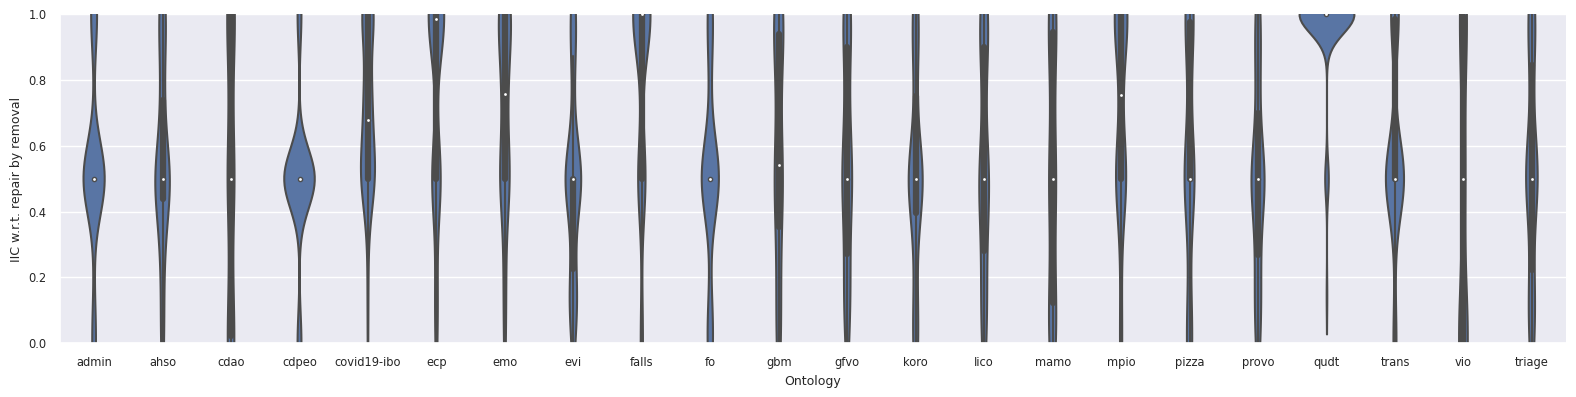

In [51]:
sns.set(font_scale=0.75)
sns.catplot(data=repair_data, kind='violin', x='Ontology', y='IIC w.r.t. repair by removal', height=4, aspect=4, color='b')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-violin.png', dpi=400)

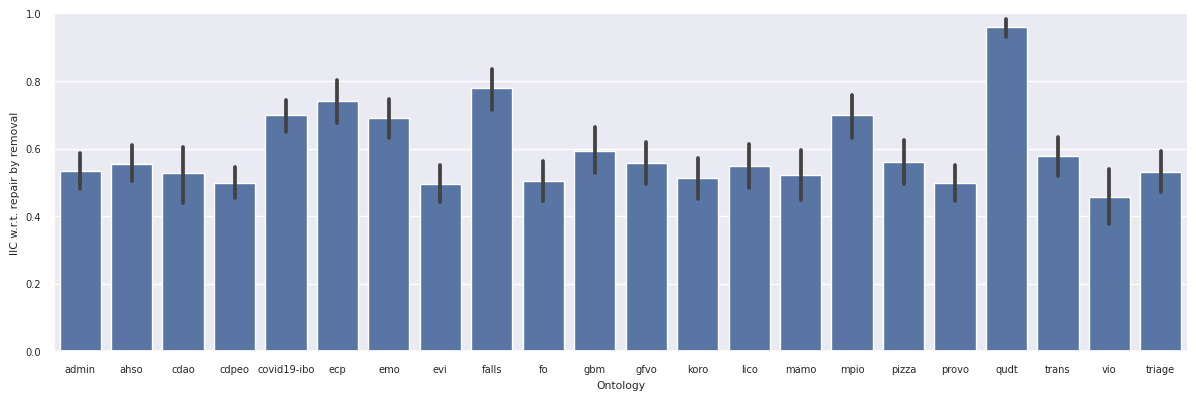

In [52]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='bar', x='Ontology', y='IIC w.r.t. repair by removal', height=4, aspect=3, color='b')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-bar.png', dpi=400)

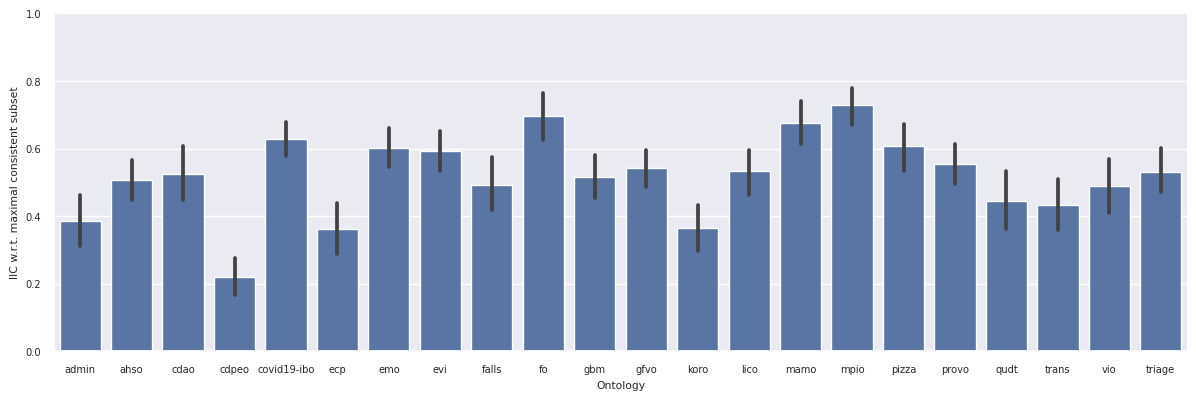

In [53]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='bar', x='Ontology', y='IIC w.r.t. maximal consistent subset', height=4, aspect=3, color='b')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-bar.png', dpi=400)

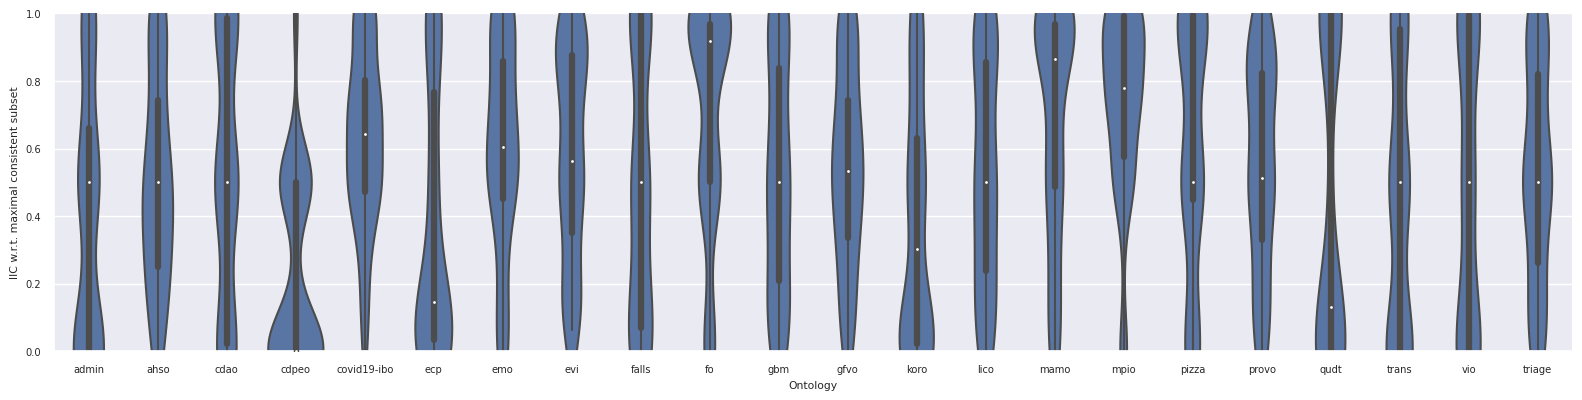

In [54]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='violin', x='Ontology', y='IIC w.r.t. maximal consistent subset', height=4, aspect=4, color='b')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-violin.png', dpi=400)

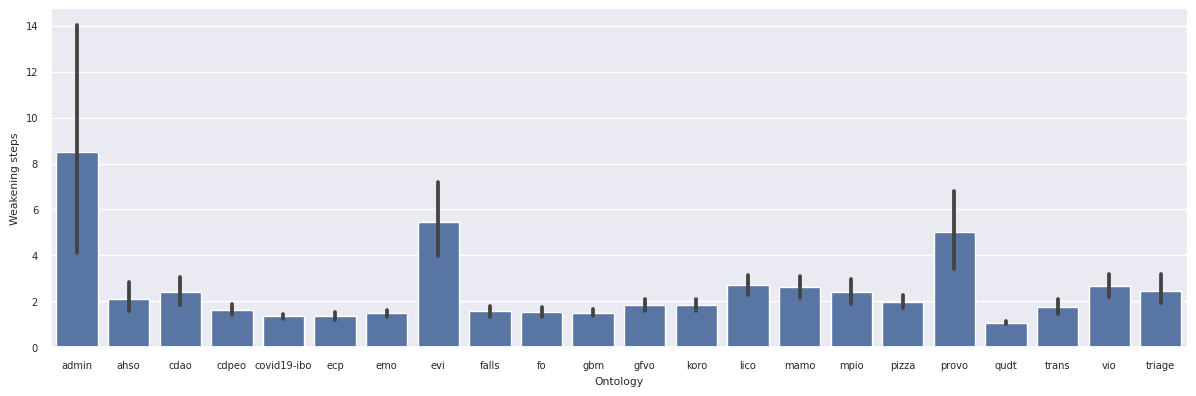

In [55]:
sns.set(font_scale=0.65)
sns.catplot(data=repair_data, kind='bar', x='Ontology', y='Weakening steps', height=4, aspect=3, color='b')
plt.savefig('../../figures/steps-ontology-bar.png', dpi=400)

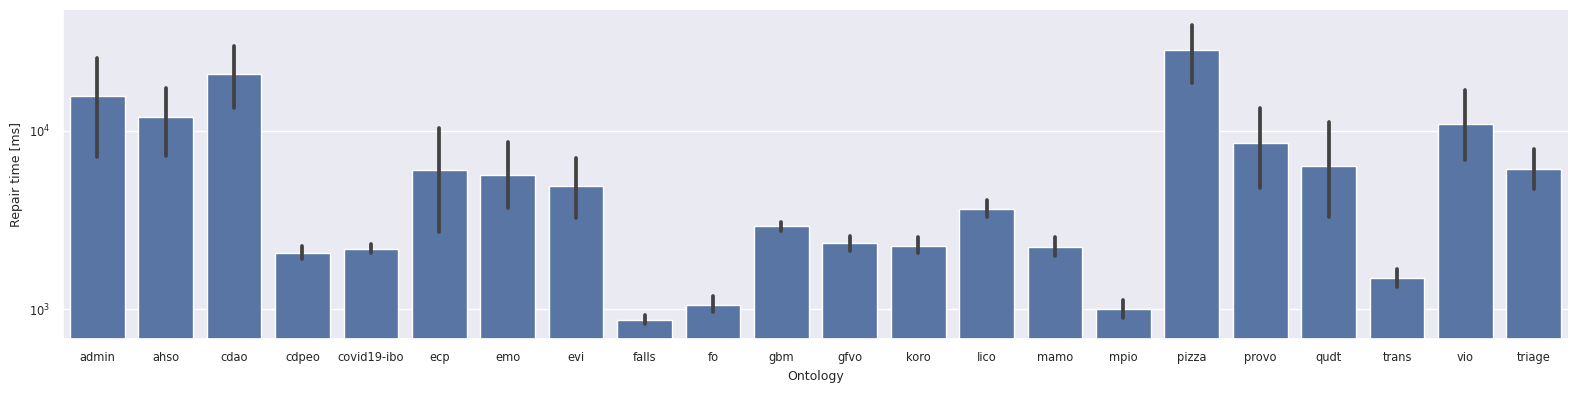

In [56]:
sns.set(font_scale=0.75)
sns.catplot(data=repair_data, kind='bar', x='Ontology', y='Repair time [ms]', height=4, aspect=4, color='b')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-bar.png', dpi=400)

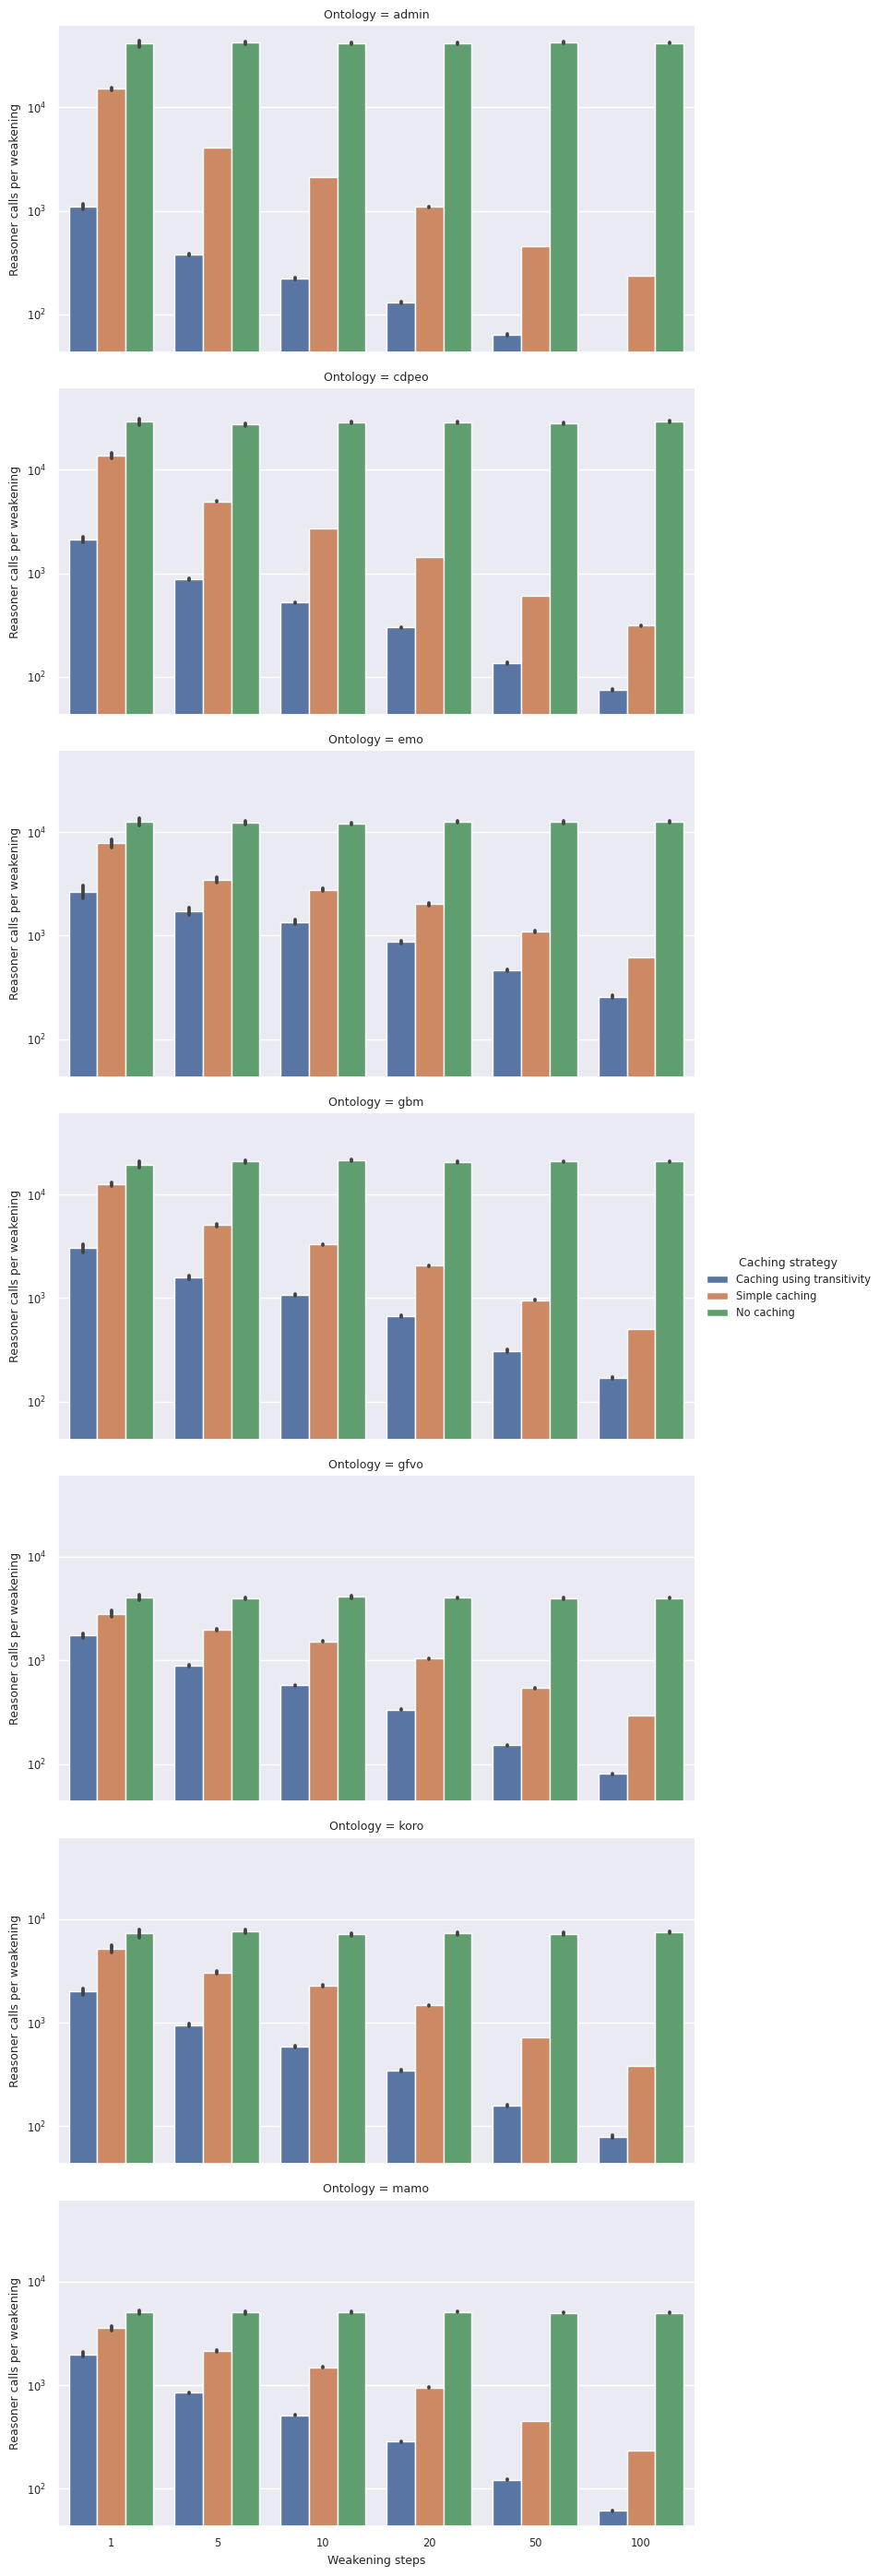

In [57]:
sns.set(font_scale=0.75)
order = pd.Index(['Caching using transitivity', 'Simple caching', 'No caching'], name='Caching strategy')
g = sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening', hue='Caching strategy', row='Ontology', height=4, aspect=2, hue_order=order)
plt.yscale('log')
plt.savefig('../../figures/calls-cache-ontology-bar.png', dpi=400)

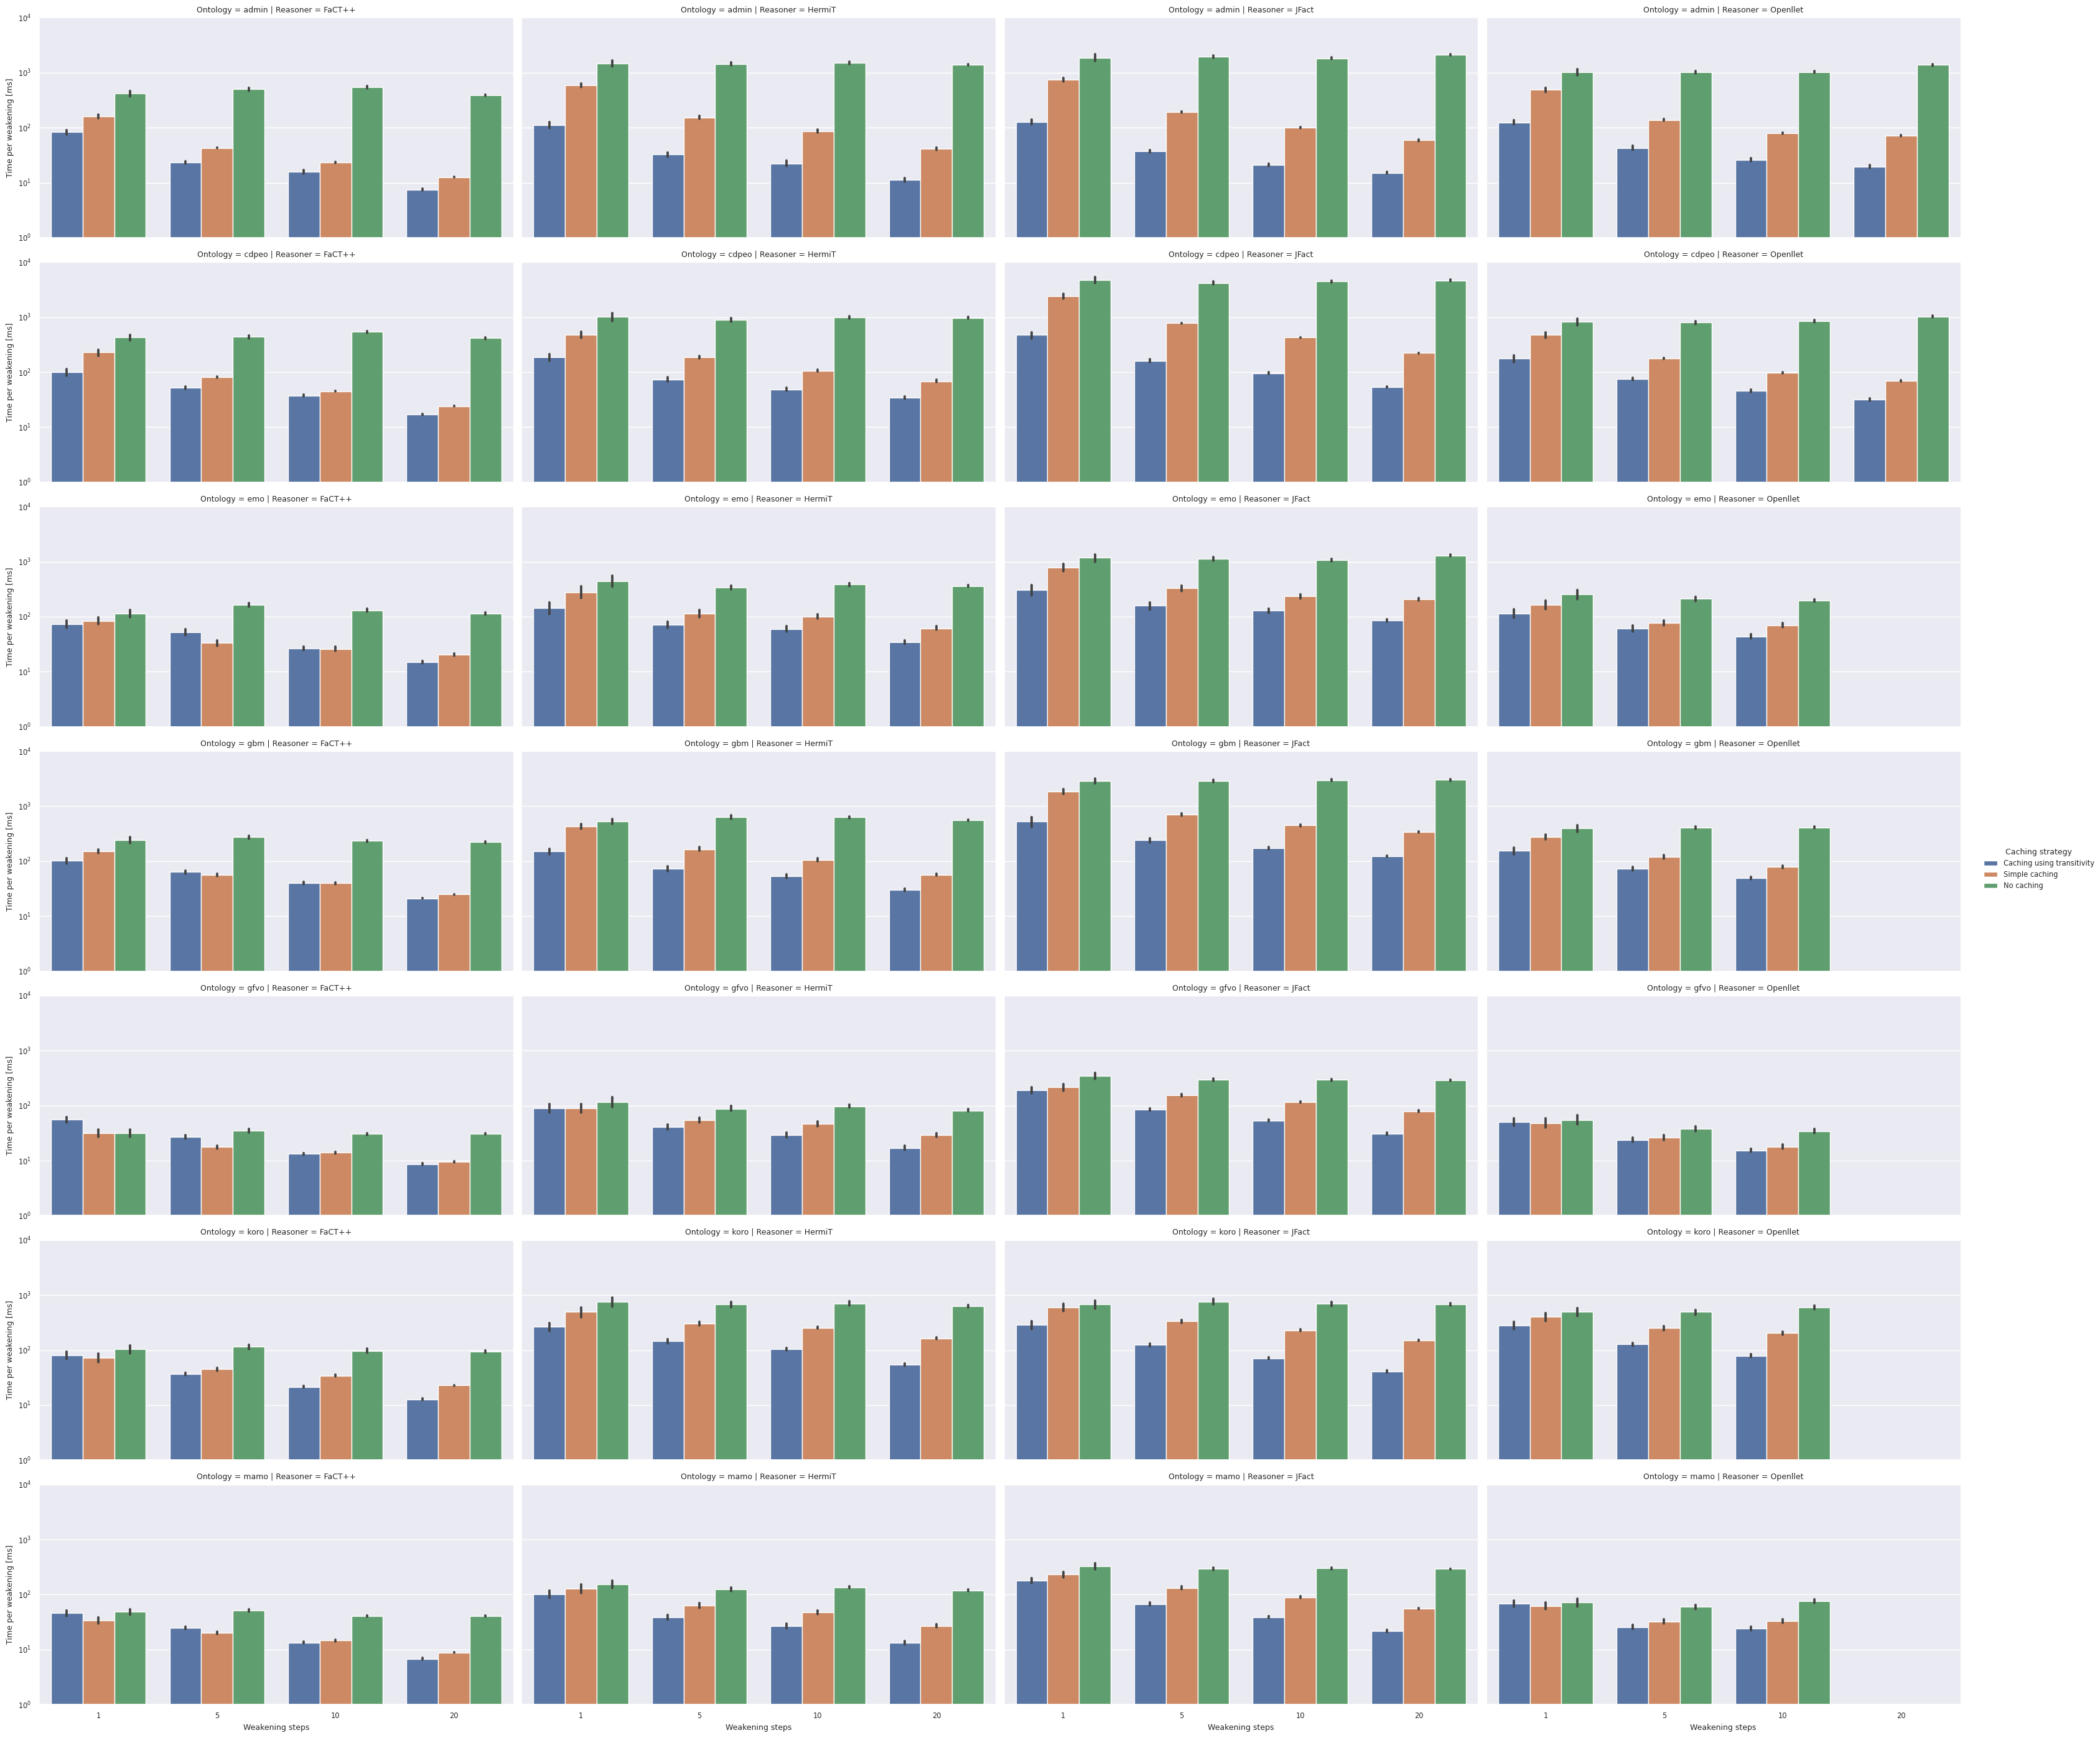

In [58]:
sns.set(font_scale=0.75)
order = pd.Index(['Caching using transitivity', 'Simple caching', 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='Weakening steps', y='Time per weakening [ms]', hue='Caching strategy', row='Ontology', col='Reasoner', height=4, aspect=2, hue_order=order)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png', dpi=400)

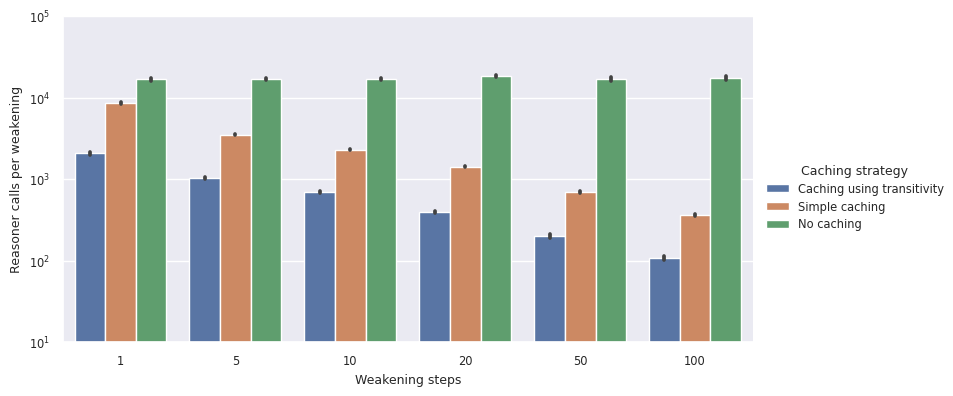

In [59]:
sns.set(font_scale=0.75)
order = pd.Index(['Caching using transitivity', 'Simple caching', 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening', hue='Caching strategy', height=4, aspect=2, hue_order=order)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png', dpi=400)

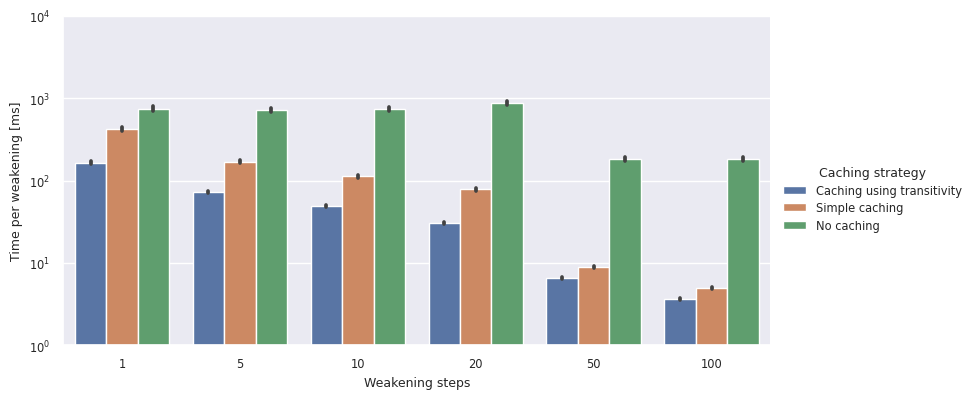

In [60]:
sns.set(font_scale=0.75)
order = pd.Index(['Caching using transitivity', 'Simple caching', 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Time per weakening [ms]', hue='Caching strategy', height=4, aspect=2, hue_order=order)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png', dpi=400)